# [MidExam]-[MATH6149016 ; MATH6149049 ]-[MachineLearning]

**Thursday, April 28, 2022.**

**Student Name**  :Devin Augustin   
**Student ID**    :2440094352     

***Task:***   
**You are required to build `the best` multiclass classifier for the `studentsprofile` dataset**   
Your objectives are to:     
o Conduct a thorough exploratory data analysis (using graphs, statistical test, etc. and a verbal analysis)   
o Build `multiple potentially suitable classification models` (at least 2 different machine learning models).    
`For example:`  By using different attributes or proportion for training and testing set or machine learning algorithms for each model or other schemas.       
o Choose what you assume to be the `"best"` model from these models for a final submission   

### 1. Data Description   
The dataset was collected from a online educational platform that show students developer profile.   
The dataset contains the following columns:  

`USERID`                        - ID for each student   
`HDS(HOURSDATASCIENCE)`         - Numbers of hours studied data science courses   
`HBE(HOURSBACKEND)`             - Numbers of hours studied web (Back-End)   
`HFE(HOURSFRONTEND)`            - Numbers of hours studied web (Front-End)     
`NUMCOURSESBEGINNERDATASCIENCE` - Numbers of beginner courses of Data Science completed by the student    
`NUMCOURSESBEGINNERBACKEND`     - Numbers of beginner courses of Web (Back-End) completed by the student   
`NUMCOURSESBEGINNERFRONTEND`    - Numbers of beginner courses of Web (Front-End) completed by the student   
`NUMCOURSESADVANCEDDATASCIENCE` - Numbers of advanced courses of Data Science completed by the student   
`NUMCOURSESADVANCEDBACKEND`     - Numbers of advanced courses of Web (Back-End) completed by the student   
`NUMCOURSESADVANCEDFRONTEND`    - Numbers of advanced courses of Web (Front-End) completed by the student   
`AVGSCOREDATASCIENCE`           - Average score in Data Science completed by the student   
`AVGSCOREBACKEND`               - Average score in Web (Back-End) completed by the student   
`AVGSCOREFRONTEND`              - Average score in Web (Front-End) completed by the student      
`StudentProfile`                - Tech profile of the students (beginner_front_end, advanced_front_end, beginner_back_end, advanced_back_end, beginner_data_science, advanced_data_science)   

### (2% of points) - 2. Get the Data 

##### Apply data acquistion and give explanation on each output

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("studentprofile.csv")
df

,UserID,HDS,HBE,HFE,NUMCOURSESBEGINNERDATASCIENCE,NUMCOURSESBEGINNERBACKEND,NUMCOURSESBEGINNERFRONTEND,NUMCOURSESADVANCEDDATASCIENCE,NUMCOURSESADVANCEDBACKEND,NUMCOURSESADVANCEDFRONTEND,AVGSCOREDATASCIENCE,AVGSCOREBACKEND,AVGSCOREFRONTEND,StudentProfile
0,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,66754730,0.0,44.0,42.0,8.0,4.0,7.0,3.0,3.0,3.0,74.0,73.0,93.0,advanced_backend
19996,6874888,0.0,85.0,63.0,3.0,5.0,0.0,4.0,7.0,3.0,50.0,83.0,94.0,advanced_front_end
19997,83752787,32.0,50.0,22.0,0.0,4.0,0.0,6.0,2.0,3.0,61.0,81.0,75.0,advanced_backend
19998,45806698,0.0,96.0,69.0,3.0,3.0,3.0,5.0,7.0,4.0,64.0,68.0,68.0,advanced_front_end


We are importing the pakckages we are going to use and the dataset. We called df here to see how the data looks on the surface.

### (20% of points) - 3. Data Exploration

##### Apply data exploration, report the characteristics of your dataset (type of attributes & distribution, % of missing values, type of noise) and correlations between attributes (you may use statistical summaries and graphs), and write down your analysis and findings

In [2]:
df1 = df.copy()
df1

#Let's look for null values
df1.isnull().sum()

UserID                              0
HDS                                14
HBE                                53
HFE                                16
NUMCOURSESBEGINNERDATASCIENCE      26
NUMCOURSESBEGINNERBACKEND          18
NUMCOURSESBEGINNERFRONTEND         39
NUMCOURSESADVANCEDDATASCIENCE       2
NUMCOURSESADVANCEDBACKEND           8
NUMCOURSESADVANCEDFRONTEND         37
AVGSCOREDATASCIENCE               220
AVGSCOREBACKEND                    84
AVGSCOREFRONTEND                  168
StudentProfile                      0
dtype: int64

Here we can see the null values from each attributes. Some have a lot of values missing and some don't.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UserID                          20000 non-null  int64  
 1   HDS                             19986 non-null  float64
 2   HBE                             19947 non-null  float64
 3   HFE                             19984 non-null  float64
 4   NUMCOURSESBEGINNERDATASCIENCE   19974 non-null  float64
 5   NUMCOURSESBEGINNERBACKEND       19982 non-null  float64
 6   NUMCOURSESBEGINNERFRONTEND      19961 non-null  float64
 7   NUMCOURSESADVANCEDDATASCIENCE   19998 non-null  float64
 8   NUMCOURSESADVANCEDBACKEND       19992 non-null  float64
 9   NUMCOURSESADVANCEDFRONTEND      19963 non-null  float64
 10  AVGSCOREDATASCIENCE             19780 non-null  float64
 11  AVGSCOREBACKEND                 19916 non-null  float64
 12  AVGSCOREFRONTEND                

By using df1.info we can see the type from each attiributes.

Let's plot the attributes to find the distributions for each values.

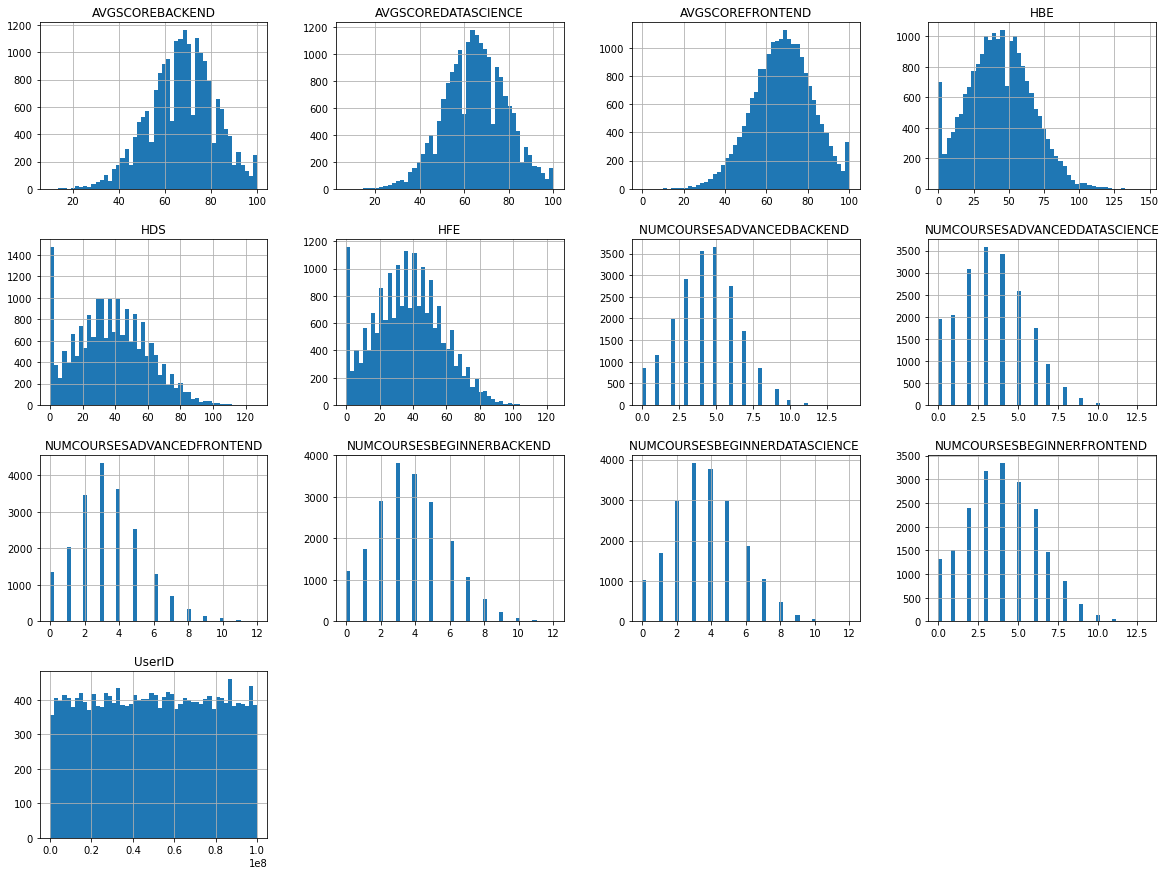

In [4]:
df1.hist(bins=50, figsize=(20,15))
plt.show()

From this histogram we can see that the data distributions are either right skewed or left skewed.

advanced_backend         3339
advanced_front_end       3337
beginner_front_end       3335
beginner_backend         3332
advanced_data_science    3330
beginner_data_science    3327
Name: StudentProfile, dtype: int64

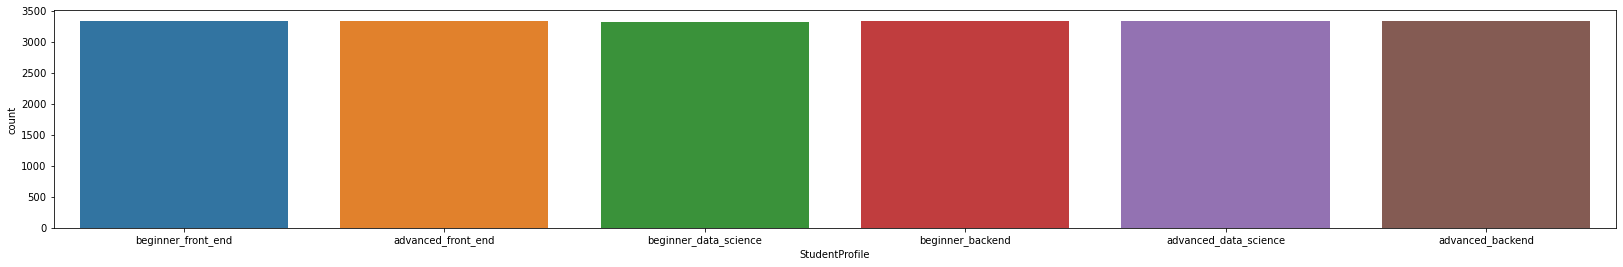

In [5]:
fig, axes = plt.subplots(figsize=(28, 4))

sns.countplot(ax=axes, x='StudentProfile', data=df1)

df1['StudentProfile'].value_counts()

In [6]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,UserID,HDS,HBE,HFE,NUMCOURSESBEGINNERDATASCIENCE,NUMCOURSESBEGINNERBACKEND,NUMCOURSESBEGINNERFRONTEND,NUMCOURSESADVANCEDDATASCIENCE,NUMCOURSESADVANCEDBACKEND,NUMCOURSESADVANCEDFRONTEND,AVGSCOREDATASCIENCE,AVGSCOREBACKEND,AVGSCOREFRONTEND
UserID,1.000000,-0.001516,0.004521,-0.006331,0.006075,0.000751,0.001496,-0.003448,0.010077,0.007498,0.000067,-0.001028,-0.008334
HDS,-0.001516,1.000000,0.022285,-0.089033,0.136486,0.125067,0.000017,0.058442,0.073649,-0.109489,-0.301230,-0.242225,0.004830
HBE,0.004521,0.022285,1.000000,-0.035490,0.268036,-0.043361,-0.090044,0.111465,0.024306,0.052282,0.003883,-0.006452,0.007383
HFE,-0.006331,-0.089033,-0.035490,1.000000,-0.128500,-0.074759,-0.028532,0.057225,-0.032870,-0.053744,-0.184332,0.067357,0.044491
NUMCOURSESBEGINNERDATASCIENCE,0.006075,0.136486,0.268036,-0.128500,1.000000,-0.052426,0.238592,0.074982,-0.133970,0.132124,0.020116,0.021273,0.160469
NUMCOURSESBEGINNERBACKEND,0.000751,0.125067,-0.043361,-0.074759,-0.052426,1.000000,-0.100345,-0.033242,0.058451,-0.154530,0.037070,0.039767,-0.188923
NUMCOURSESBEGINNERFRONTEND,0.001496,0.000017,-0.090044,-0.028532,0.238592,-0.100345,1.000000,-0.074133,-0.168319,0.135645,-0.078857,0.047987,0.079742
NUMCOURSESADVANCEDDATASCIENCE,-0.003448,0.058442,0.111465,0.057225,0.074982,-0.033242,-0.074133,1.000000,-0.091480,0.134659,0.089992,0.099666,0.115238
NUMCOURSESADVANCEDBACKEND,0.010077,0.073649,0.024306,-0.032870,-0.133970,0.058451,-0.168319,-0.091480,1.000000,-0.143084,-0.003818,-0.198806,-0.114480
NUMCOURSESADVANCEDFRONTEND,0.007498,-0.109489,0.052282,-0.053744,0.132124,-0.154530,0.135645,0.134659,-0.143084,1.000000,0.098260,0.185907,0.123394


[Text(0.5, 1.0, 'Correlation Matrix')]

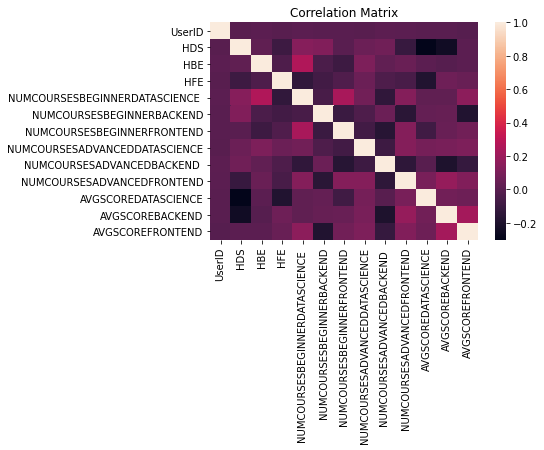

In [7]:
hm = sns.heatmap(corr)
hm.set(title = "Correlation Matrix")

From this, we can conclude that the type of noise in this dataset is attribute noise since we have missing/unknown values.

### (15% of points) - 4. Data Preparation 

##### Prepare your data for machine learning and explain the outputs

Let's drop all the null values in our dataset

In [8]:
df2 = df1.dropna()
df2.isnull().sum()

UserID                            0
HDS                               0
HBE                               0
HFE                               0
NUMCOURSESBEGINNERDATASCIENCE     0
NUMCOURSESBEGINNERBACKEND         0
NUMCOURSESBEGINNERFRONTEND        0
NUMCOURSESADVANCEDDATASCIENCE     0
NUMCOURSESADVANCEDBACKEND         0
NUMCOURSESADVANCEDFRONTEND        0
AVGSCOREDATASCIENCE               0
AVGSCOREBACKEND                   0
AVGSCOREFRONTEND                  0
StudentProfile                    0
dtype: int64

As you can see now, there is no missing value anymore. Drop the UserID column since we are not going to use it

In [9]:
df2.drop(columns=["UserID"], inplace=True)
df2

C:\Users\DEVIN\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,HDS,HBE,HFE,NUMCOURSESBEGINNERDATASCIENCE,NUMCOURSESBEGINNERBACKEND,NUMCOURSESBEGINNERFRONTEND,NUMCOURSESADVANCEDDATASCIENCE,NUMCOURSESADVANCEDBACKEND,NUMCOURSESADVANCEDFRONTEND,AVGSCOREDATASCIENCE,AVGSCOREBACKEND,AVGSCOREFRONTEND,StudentProfile
11,39.0,52.0,34.0,2.0,4.0,4.0,1.0,5.0,5.0,69.0,65.0,73.0,beginner_backend
12,28.0,44.0,16.0,3.0,2.0,5.0,0.0,4.0,4.0,41.0,40.0,76.0,beginner_data_science
13,74.0,36.0,41.0,2.0,5.0,2.0,3.0,4.0,2.0,52.0,77.0,66.0,advanced_front_end
14,69.0,40.0,18.0,4.0,3.0,5.0,4.0,7.0,6.0,40.0,82.0,78.0,advanced_data_science
15,46.0,102.0,44.0,7.0,9.0,3.0,5.0,3.0,3.0,69.0,94.0,50.0,advanced_front_end
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,44.0,42.0,8.0,4.0,7.0,3.0,3.0,3.0,74.0,73.0,93.0,advanced_backend
19996,0.0,85.0,63.0,3.0,5.0,0.0,4.0,7.0,3.0,50.0,83.0,94.0,advanced_front_end
19997,32.0,50.0,22.0,0.0,4.0,0.0,6.0,2.0,3.0,61.0,81.0,75.0,advanced_backend
19998,0.0,96.0,69.0,3.0,3.0,3.0,5.0,7.0,4.0,64.0,68.0,68.0,advanced_front_end


Now, we're going to create the test set

In [10]:
x=df2.iloc[:,0:-1]

y=df2["StudentProfile"]
y=pd.DataFrame(y,columns=["StudentProfile"])

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (15462, 12)
X_test shape:  (3866, 12)
Y_train shape:  (15462, 1)
Y_test shape:  (3866, 1)


###  (35% of points) - 5. Shortlist promising models

**Now, you can train your models, evaluate the models, and compare their performances by displaying the performance metrics for each models.**   
***`You will get 10 extra points if you correctly compare your model using standard parameters against hyperparameters and provide a clear explanation.`***

In [12]:
def evaluate(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test) 
    
    #printing the model name and accuracy !!!!!
    print("Model name:---->>>",model)
    print("accuracy score:--->>",accuracy_score(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("<<<<-------------------------------------------------------------------->>>>")

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


In [14]:
#Initialize the models 
LR=LogisticRegression(solver="newton-cg") #Logistic regression.
knn=KNeighborsClassifier(metric='manhattan',n_neighbors=1,weights='uniform') 
svc=SVC(C=100,gamma=1,kernel='rbf',random_state=42) # support vector classifier.
dtc=DecisionTreeClassifier()


models=[LR,knn,svc,dtc] #create a list of models 

for model in models:
    evaluate(model)

Model name:---->>> LogisticRegression(solver='newton-cg')
accuracy score:--->> 0.7030522503879979


                       precision    recall  f1-score   support

     advanced_backend       0.77      0.75      0.76       620
advanced_data_science       0.69      0.68      0.68       662
   advanced_front_end       0.76      0.71      0.73       695
     beginner_backend       0.61      0.60      0.60       612
beginner_data_science       0.71      0.69      0.70       638
   beginner_front_end       0.68      0.79      0.73       639

             accuracy                           0.70      3866
            macro avg       0.70      0.70      0.70      3866
         weighted avg       0.70      0.70      0.70      3866

<<<<-------------------------------------------------------------------->>>>
Model name:---->>> KNeighborsClassifier(metric='manhattan', n_neighbors=1)
accuracy score:--->> 0.768235902741852


                       precision    recall  f1-score   support

     advan

In [15]:
rf=RandomForestClassifier(random_state=42) #random forest classifier.
gbr=GradientBoostingClassifier(learning_rate= 1,n_estimators=300,criterion='mse',random_state=42)

models=[rf,gbr] #create a list of models 

for model in models:
    evaluate(model)

Model name:---->>> RandomForestClassifier(random_state=42)
accuracy score:--->> 0.9161924469736161


                       precision    recall  f1-score   support

     advanced_backend       0.94      0.92      0.93       620
advanced_data_science       0.91      0.87      0.89       662
   advanced_front_end       0.91      0.92      0.91       695
     beginner_backend       0.89      0.91      0.90       612
beginner_data_science       0.93      0.93      0.93       638
   beginner_front_end       0.92      0.95      0.94       639

             accuracy                           0.92      3866
            macro avg       0.92      0.92      0.92      3866
         weighted avg       0.92      0.92      0.92      3866

<<<<-------------------------------------------------------------------->>>>
Model name:---->>> GradientBoostingClassifier(criterion='mse', learning_rate=1, n_estimators=300,
                           random_state=42)
accuracy score:--->> 0.880237972064149


      

# Results from our models:
### 1. RandomForestClassifier (91.6%)
### 2. GradientBoostingClassifier (88%)
### 3. DecisionTreeClassifier (76.9%)
### 4. KNeighborsClassifier (76.8%)
### 5. LogisticRegression (70.3%)
### 6. SVC (16%)

### (3% of points) - 6. Select Your Final Model 

#### You finally have your final model. Write comments to justify your final model

In [16]:
rf=RandomForestClassifier(random_state=42) #random forest classifier.

evaluate(rf)

Model name:---->>> RandomForestClassifier(random_state=42)
accuracy score:--->> 0.9161924469736161


                       precision    recall  f1-score   support

     advanced_backend       0.94      0.92      0.93       620
advanced_data_science       0.91      0.87      0.89       662
   advanced_front_end       0.91      0.92      0.91       695
     beginner_backend       0.89      0.91      0.90       612
beginner_data_science       0.93      0.93      0.93       638
   beginner_front_end       0.92      0.95      0.94       639

             accuracy                           0.92      3866
            macro avg       0.92      0.92      0.92      3866
         weighted avg       0.92      0.92      0.92      3866

<<<<-------------------------------------------------------------------->>>>


Since Random Forest Classifier gives us the best result compare to other models, we will select it as our model.

***Verified by,***
   
[Noviyanti TM Sagala] (D6464) and sent to Department/Program on 04 04, 2022    
